<a href="https://colab.research.google.com/github/hinton024/Project/blob/main/Copy_of_cp_gnn_till_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

Gen RAM Free: 12.7 GB  | Proc size: 120.0 MB
GPU RAM Free: 11441MB | Used: 0MB | Util   0% | Total 11441MB


In [ ]:
!kill -9 -1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Basic pre-reqs
import numpy as np

!pip install celluloid

In [ ]:
#import the particle model and simulation model
!wget https://raw.githubusercontent.com/hinton024/Project/main/simulate.py -O simulate.py

--2021-10-14 03:49:07--  https://raw.githubusercontent.com/hinton024/Project/main/simulate_1.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9168 (9.0K) [text/plain]
Saving to: ‘simulate.ipynb’

simulate.ipynb      100%[===================>]   8.95K  --.-KB/s    in 0s      

2021-10-14 03:49:07 (74.5 MB/s) - ‘simulate.ipynb’ saved [9168/9168]



In [ ]:
pip install ipynb

In [ ]:
#call simulation environment
import import_ipynb
import ipynb
import simulate

In [ ]:
#no of simulations
ns = 10000
# Potential 
sim = 'charge'
# Number of nodes
n = 4
# Dimension
dim = 2
# Number of time steps
nt = 1000
#Standard simulation sets:
n_set = [4, 8]
sim_sets = [
 {'sim': 'charge', 'dt': [1e-3], 'nt': [1000], 'n': n_set, 'dim': [2, 3]},
]


#Select the hand-tuned dt value for a smooth simulation
# (since scales are different in each potential):
dt = [ss['dt'][0] for ss in sim_sets if ss['sim'] == sim][0]

title = '{}_n={}_dim={}_nt={}_dt={}'.format(sim, n, dim, nt, dt)
print('Running on', title)

Running on charge_n=4_dim=2_nt=1000_dt=0.001


In [ ]:
#from simulate import SimulationDataset
#from ipynb.fs.full.simulate import *
s = SimulationDataset(sim, n=n, dim=dim, nt=nt//2, dt=dt)
# Update this to your own dataset, or regenerate:
base_str = './'
data_str = title
s.simulate(ns)

NameError: ignored

In [ ]:
data = s.data
s.data.shape

(10000, 500, 4, 6)

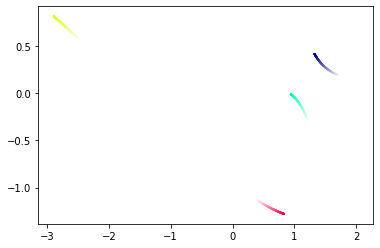

In [ ]:
s.plot(0, animate=True, plot_size=False)

In [ ]:
def get_potential(sim, sim_obj):

    dim = sim_obj._dim

    @jit
    def potential(x1, x2):
      """The potential between nodes x1 and x2"""
      dist = np.sqrt(np.sum(np.square(x1[:dim] - x2[:dim])))
     
      min_dist = 1e-2
    #   bounded_dist = dist*(dist > min_dist) + min_dist*(dist <= min_dist)
      bounded_dist = dist + min_dist

      if sim in 'charge':
          charge1 = x1[-2]
          charge2 = x2[-2]

          potential = charge1*charge2/bounded_dist
        
          return potential
      else:
          raise NotImplementedError('No such simulation ' + str(sim))

    return potential
get_potential('charge', sim_obj)

NameError: ignored